# Reading the data

In [118]:
PATH_DIR = '/content/drive/MyDrive/01 - Iniciação Científica/02 - Datasets/exoplanets_confirmed/resampled_files/RESAMPLED_EN2_STAR_CHR_0101086161_20070516T060226_20071005T074409.csv'

In [119]:
import pandas as pd

data = pd.read_csv(PATH_DIR)
data.head()

,DATE,WHITEFLUX
0,2007-05-16 18:10:55.071642,112521.329834
1,2007-05-16 18:24:29.950108,112758.045853
2,2007-05-16 18:38:04.828574,112943.042225
3,2007-05-16 18:51:39.707040,112562.266242
4,2007-05-16 19:05:14.585506,112789.303079


In [120]:
from datetime import datetime

time = data.DATE
flux = data.WHITEFLUX

try: 
  time = [datetime.strptime(i, '%Y-%m-%d %H:%M:%S.%f') for i in time]
except:
  time = [datetime.strptime(i, '%Y-%m-%d %H:%M:%S') for i in time]

After, let's import the `tools` package with the support algorithms

In [121]:
from tools import *

Plotting the chosen curve


In [122]:
viz.view_lightcurve(time, flux)

# Feature: Periodograms

---



## Spectrum generation


In [127]:
sample_time = pd.Series(time).diff().min()
sample_frequency = 1 / sample_time.seconds

print("The series have a time sample of {} minutes, so the sample frequency is {} Hz".format(sample_time, round(sample_frequency, 6)))

The series have a time sample of 0 days 00:13:34.878465 minutes, so the sample frequency is 0.001229 Hz


In [124]:
import scipy.signal as scs

X, Y = scs.periodogram(flux, fs=sample_frequency, scaling='density')

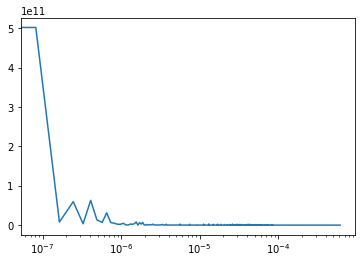

In [125]:
import matplotlib.pyplot as plt

plt.semilogx(X, Y)
plt.show()